## Music Recommender  MVP

### Case Study - The site for recommendations - "Gnod"

#### Scenario

You have been hired as a Data Analyst for “Gnod”.

“Gnod” is a site that provides recommendations for music, art, literature and products based on collaborative filtering algorithms. Their flagship product is the music recommender, which you can try at www.gnoosic.com. The site asks users to input 3 bands they like, and computes similarity scores with the rest of the users. Then, they recommend to the user bands that users with similar tastes have picked.

“Gnod” is a small company, and its only revenue stream so far are adds in the site. In the future, they would like to explore partnership options with music apps (such as Deezer, Soundcloud or even Apple Music and Spotify). However, for that to be possible, they need to expand and improve their recommendations.

That’s precisely where you come in. They have hired you as a Data Analyst, and they expect you to bring a mix of technical expertise and business mindset to the table.


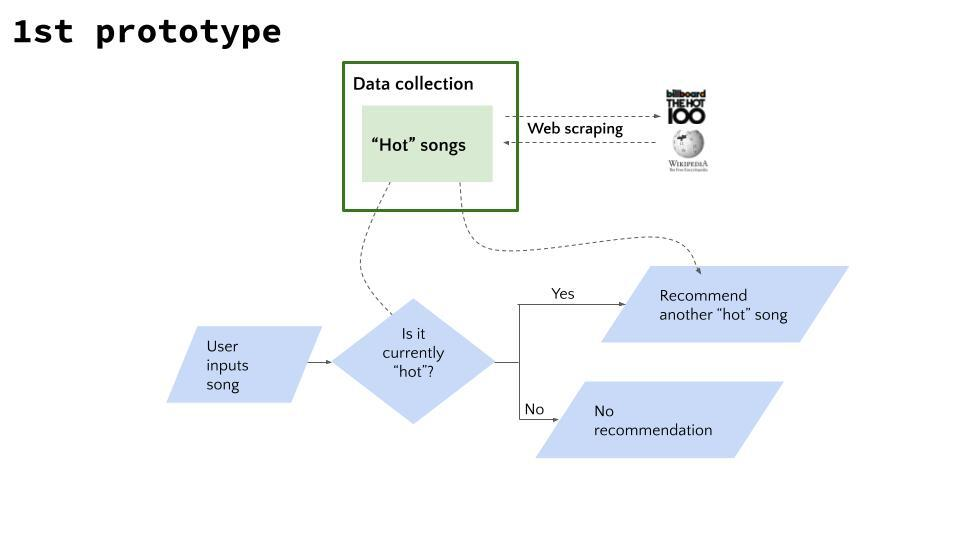

In [1]:
from IPython.display import Image 
img = Image(filename='gnod_1st_iteration.jpg')
display(img)

### get top 100 songs 

- you can either include the webscraper cells here to replace (option 1) 
- or import the csv with your scraped results and change the file reference (option 2)


-----------

In [9]:
#OPTION 1 - scrape top 100
from bs4 import BeautifulSoup 
import requests 
import pandas as pd 

In [10]:
url="https://www.billboard.com/charts/hot-100"
response = requests.get(url)
response.status_code

200

In [11]:
soup=BeautifulSoup(response.content, 'html.parser')
title = []
performers = []
songs=soup.select("span.chart-element__information")
len_songs = len(songs)

for i in range(len_songs):
    title.append(soup.select("span.chart-element__information__song")[i].text)
    performers.append(soup.select("span.chart-element__information__artist")[i].text)

In [12]:
top_100 = pd.DataFrame({'title':title,'performed_by':performers})
top_100.to_csv('top100.csv')
# end of OPTION 1 

-------

In [ ]:
# OPTION 2 import top 100 csv file 

import pandas as pd 
top_100 = pd.read_csv('top100.csv')
# end of OPTION 2

---------

### User is asked to input a song 

- the point of this is to take a user input parameter of song name
- search for that song in the top 100 list (turn input and title column to lowercase)
- if found, recommend another song (any) from the list 
- if not found, provide a response 

#### Next step 
-- check validity of user input /deal with invalid input- typos etc 
-- extend the model to include more songs (2nd prototype)
-- modularise the code to make it neater 

#### how to use this function 
+ you will need to replace references to variables with your own named variables and columns 
+ ie, what is your top 100 scrape results called (top_100), what are the columns named for song (title) and artist (performed_by) 

In [13]:
def recommender():
    from random import randint
    #input from user
    song_choice=input("What song do you like right now?")
    if len(song_choice)==0:
        print("it looks like you cant think of a song at the moment")
    else: 
        song_choice_l=song_choice.lower() #convert input to lowercase
        filter_song=top_100[(top_100["title"].str.lower()).str.contains(song_choice_l)]# convert target to lowercase
        #check if its in the list we have
        if len(filter_song) ==0:
            print("that song is not hot, sorry")

        else:
            # if song is in billboard hot 100, confirm it, recommend another random hot song
            print("That's a hot song.")
            random_song = randint(0, len(top_100)-1)
            print("You might also like " + top_100["title"][random_song] + " by " + top_100["performed_by"][random_song])

In [15]:
recommender()

What song do you like right now?
it looks like you cant think of a song at the moment


-------

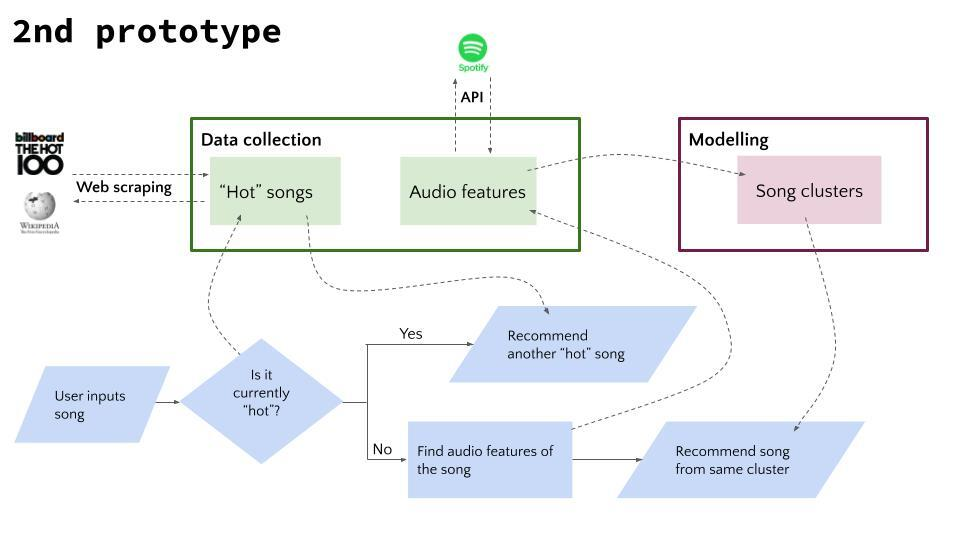

In [8]:
img = Image(filename='gnod_2nd_iteration.jpg')
display(img)